# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
The simulation shows the environment, smartcab (driving agent) and other cars operating in the environment. The world is organized as a series of 4 direction intersections. Signal(Red light/Green light) is indicated by the red lines showing which directions cars can pass through. The simulation also shows the action taken by the agent and the reward received.

The Smartcab is not moving during the simulation. The agent is receiving rewards in the form of points (positive or negative based on the action). When there is a red light, agent receives positive reward for no action. Where there is a green light, agent receives negative reward for no action. This is in line with the safety and reliability metrics as the smartcab should not move at red light and move during the green light to reach its destination. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
**agent.py**
1. learning - boolean flag indicating whether the smartcab is expected learning 
2. epsilon - exploration factor which indicates the probability with which an agent will choose a random action instead of the action with maximum reward
3. alpha - learning factor with a value between 0 and 1. If the learning factor is 1, it implies full learning and the agent does not remember anything from the past state. 

**environment.py** -
act() function from the environment class is called when the agent performs an action. The act function determines the reward for the agents action depending on factors including - time remaining before the deadline and validity of th eagent's action. It determines if the agent is commiting a violation and the level of violation. If there is no violation the agent is moved and the states updated. It also determines if the agent has reach destination and the time taken to reach the destination. 

**simulator.py**
render_text() displays the trial data (agent action, state and reward) from simulation as text in the terminal. 
render() function renders the simulation GUI. It renders the different agents, environment as well as trial data from the simulation in a GUI.

**planner.py**
next_waypoint() considers East-West direction first.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


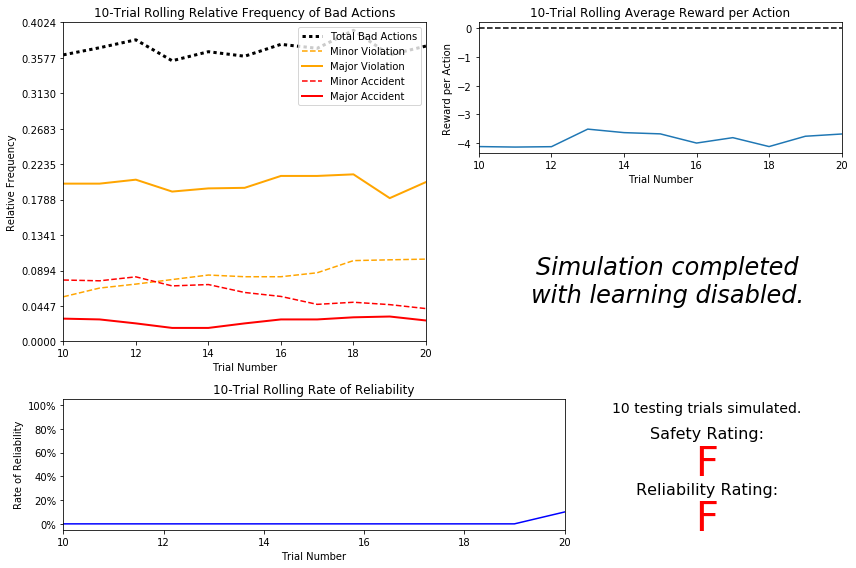

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
The visualization above shows the simulation results with no learning. With no learning the smartcab is making bad decisions with a relative frequency of approximately 0.20. Of the four categories of violations - major violation has the highest relative frequency. Of all the violations, approximately 5-7% lead to accidents (major and minor combined). 

Rate of reliability reflects the number of times the agent is able to reach the destination. Since the agent is driving randomly, the average rate of reliability for smartcab across trials is very low. Using rate of reliability with no learning is not appropriate as the agent is driving randomly. Any trial when the agent is able to reach the destination is purely random and has no correlation with intelligent behaviour. 

On average we can see that the agent is receiving negative rewards for its actions. The average reward varies across trials. The agent is not being heavily penalized given that the lowest reward could be -40 for major accident. As the agent is moving at random, there will be some actions taken by the agent that are positively rewarded and the rest are negatively rewarded. Some of the negative rewards are compensated by the positive rewards and as a result the overall average is is negative but not very low. 

As the number of trials increases, there are small deviations in the average rate of reliability and the rewards received by the agent. As the agent is moving at random, the agent ends up performing both right and wrong actions. Due to this, we see small deviations in the results over trials however overall results stabilise with increasing number of trials. 

After 10 testing trials, both the safety and reliability rating of the smartcab are F. This is consistent with the low rate of reliability and the overall negative rewards received by the agent. As the agent is moving randomly, we cannot be sure whether the agent will make the right actions to reach the destination. Additionally, with no learning the agent does not distinguish between the different traffic light and oncoming vehicle conditions there by leading to high frequency of traffic violations and accidents. The smartcab with no learning is neither safe nor reliable for passengers. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**
Given a destination, the waypoint feature determines which direction the agent should move in. 

The sensor input features are important for safety. These features help the agent to determine whether an action should be taken and thereby help the agent to avoid traffic violations and accidents. Value of 'light' feature indicates whether the agent should take an action. 'Oncoming' feature indicates the intended direction of travel for the vehicle across the intersection. If it is a red light, and the oncoming vehicle is moving forward/left then the smartcab agent should not move. Since we are following the 'right of way' rules, the agent needs to know the intended direction of travel for the vehicles to its left. 

The deadline feature defines the number of actions remaining for the smartcab to reach its destination. There is a penalty for the smartcab if it does not reach the destionation within the given time frame. The deadline feature would be relevant to learning efficiency if the transition from states to action were probabilistic. Since in the given scenario, transitions are deterministic, deadline feature would not be helpful in learning efficiency. 

Therefore the waypoint and sensor inputs feature (light, oncoming, right) are most relevant for learning safety and efficiency. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
Size of the state space is given by the following - 

size_state_space = num(waypoint) x num(light) x num(left) x num(oncoming) = 96

To learn an optimal policy for each of the 94 states, the agent will have to be in each of the states with a reasonable frequency. Since the number of states is not very large, we can expect the agent to learn optimal policy within a reasonable number of training trials. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

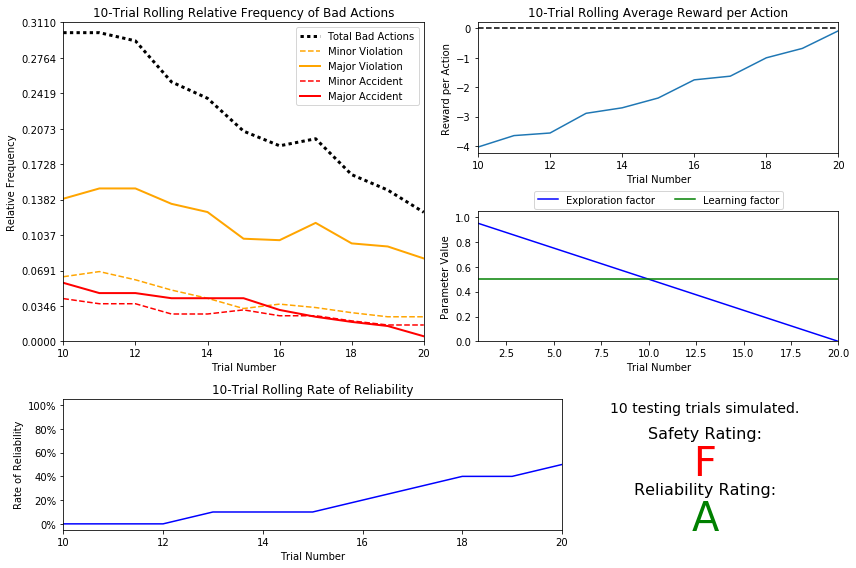

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
The Q-learning agent receives a safety rating of F and reliability rating of A. The basic agent in question 3, received an F for both safety and reliability. Thus, with Q-learning we see an improvement in the agent's reliability in reaching the destination. We see a consistent improvement in the Q-learning agent's reliability across the trials. By the 20th learning trial, the rolling average reliability rate reaches almost 50% from 0% in the 10th trial. This demonstrates that the Q-learning algorithm is enabling the driving agent to learn from its experiences. 

As for safety, with Q-learning, the relative frequency of bad actions is decreasing with trials for all the four categories of violations. However, the Q-learning agent does cause major accidents (though with lesser frequency) and therefore receives a safety rating of F. 

The driving agent required 20 learning trials before testing. We started the first learning trial with an epsilon value of 1 and with the decaying function performed the 20th learning trial with epsilon of 0. This makes sense as for the given scenario we expect the agent to have finished learning and thereby focus solely on exploitation and not on exploring. Epsilon value represents the exploration factor. When the learning starts, there is a greater emphasis on exploration as the agent does not have any 'learnt knowledge' to exploit. With more and more trials, the balance shifts more towards exploitation from exploration as the agent learns from its previous experiences. We have implemented a linear decaying function which is correctly represented by the straight line with negative slope in the parameters panel.

As the number of training trials increases, the relative frequency of bad actions is decreasing. This can be attributed to the negative rewards that the agent receives when it performs a bad action. As the number of training trial increases, the Q values for the state-action pairs get updated based on the reward receive by the agent. With the negative rewards, agent learns to avoid the bad actions (by selecting actions with maximum Q value). This results in decreasing relative frequence of bad actions and increasing average reward received per action. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

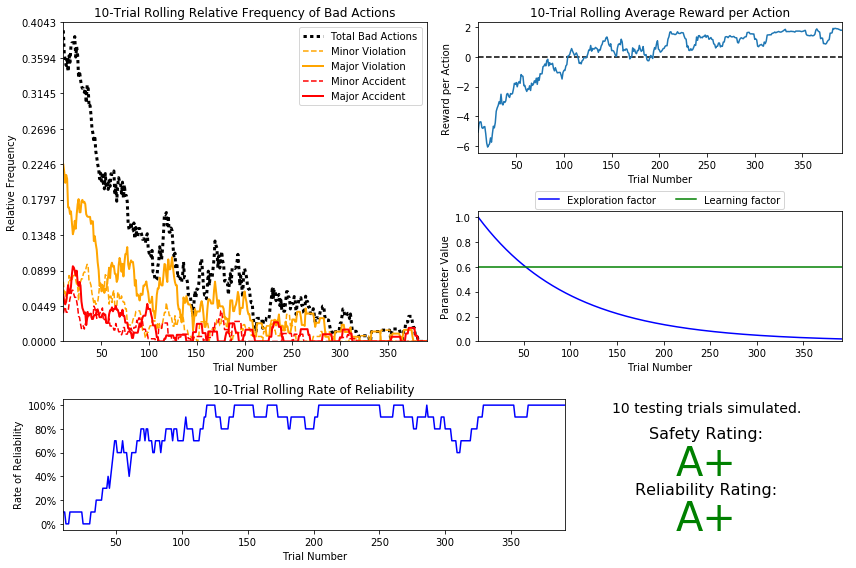

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
The following decay function was used for the exploration factor : epsilon(t+1) = 0.99 * epsilon(t)

From the parameter value chart, we can see that this is a slow decay function with an exponential form. With an epsilon tolerance of 0.02, the smartcab agent had 391 learning trials before begining testing. Learning rate (alpha) of 0.6 was used to train the smartcab agent. The choice of epsilon decay function and tolerance level ensured that the smartcab agent goes though a sufficient number of learning trials. A slow epsilon decay ensures that the agent is able to sufficiently explore new policies and learn from them before moving on to exploiting what he learns. With a fast epsilon decay function, learning agent's 'exploration' is quite limited and it is not able to explore new policies. Instead the agent is relying on what he has already learnt (exploitation) which is quite limited given the limited exploration. 

Learning rate of 0.6 gives slightly more emphasis on the reward received for performing an action and lesser on the existing Q value for the particular state,action pair. Having slightly more emphasis on the reward received ensures that the agent is able to learn from the new information (reward received) while not forgetting what was learnt in the past (Q value of the state, action)

As the number of learning trials increases, the frequency of bad actions is decreasing while the reliability rate is increasing. During the initial learning trials the average reward per action is negative. This is emphasised by the exploration phase where this greater emphasis for the agent to try out new policies. With increasing number of learning trials, the exploration factor decays and the agent is able to exploit what it has learnt. After 350 learning trials, the average reward per action is +2. This shows that the agent is able to learn successfully with the Q-learning algorithm. 

Compared to the default agent, the optimized agent showa improvement in both safety and reliability. At the completion of learning trials, the default agent has a reliability rate of around 50% and 0.17 relative frequency of bad actions. The epsilon decay function is linear which does not leave sufficient room for exploration for the agent. With the choice of epsilon decay function and tolerance, the default agent goes through 20 learning trials before testing. The number of learning trials is insufficient given the large state space. The gaent receives reliability rating of A and safety rating of F. 

The optimized agent has 0.02 relative frequency of bad actions and 80-100% rate of reliability at the completion of learning trials. This is significant improvement from the performance of default agent. The choice of epsilon decay and tolerance allow the optimized agent to go through more than 350 learning trials. The slow epsilon decay function allow the agent to explore sufficiently before exploiting what has been learnt. With this, the agent receives A+ rating for both safety and reliability. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
The optimal policy for the smartcab agent considers both safety and reliability. The optimal policy for smartcab in each state would be to move towards the target destination while avoiding traffic violations. As we are following the 'right of way' traffic rules - on red light, the optimal policy for the agent would be 'None' if the waypointis not right. On red light, if the waypoint for the agent is right, the optimal policy would be 'Right' as long as there is no oncoming car from the left. 

On green light, the optimal policy for the agent would be to follow the direction of waypoint if the waypoint is on the right or forward. If the waypoint is on the left, the agent should make a left only if there is no oncoming traffic making a right. 

State features - (waypoint, light, oncoming, left)

Examples of optimal policy :
<br>State: ('left', 'red', 'right', 'left')
<br>Action: None

State: ('forward', 'red', None, None)
<br>Action: None

State: ('right', 'red', None, 'forward')
<br>Action: None

State: ('forward', 'green', 'left', None)
<br>Action: forward

The optimized Q learning agent learns both correct and incorrect policies. 

Examples of correct policies learnt by the agent- 

<br>('right', 'green', 'forward', 'right')
 <br>-- forward : -0.27
 <br>-- right : 1.85
 <br>-- None : 0.00
 <br>-- left : 0.00
 
In this case the agent chooses action Right which is the optimal policy as the vehicle to its left intends to go right. 

<br>('left', 'red', 'right', 'left')
 <br>-- forward : -6.48
 <br>-- right : 0.18
 <br>-- None : 1.41
 <br>-- left : -24.46
 
The optimal policy is None as it is Red light and the agent needs to go left.

<br>('right', 'red', None, 'forward')
 <br>-- forward : -37.25
 <br>-- right : -19.29
 <br>-- None : 2.55
 <br>-- left : -40.30
 
The optimal policy is None as even though it is red light, there is an oncoming vehicle from the left. 

Examples of incorrect policies learnt by the agent

Policy learned for each state is not correct. There are some states when the learned policy is different from the optimal policy. 

For example:
<br>('forward', 'red', 'right', 'left')
 <br>-- forward : -8.07
 <br>-- right : 1.11
 <br>-- None : 0.00
 <br>-- left : -24.27
<br>Here the policy learnt by smartcab is the action Right. However, the optimal policy for the state should be None as the waypoint is forward and the light is red. 

The smartcab agent did not learn the optimal policy for certain states. This might be because the number of learning trials is limited and the agent is not able to be in certain states with a reasonable frequency to learn the optimal policy for these states. One possible way to overcome this is by increasing the number of learning trials. 



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
Future rewards won't work for this project for the following reasons - 

<br>1. Gamma requires the rewards to backpropagate from the final state to the current state. As such gamma requires the agent to evaluate the relationship between current state and the final state. This does not make sense as the final destination is not related to the 'safety' aspect of the current state. Even though the final destination require the agent to move in a certain direction, agen should not do so if it causes a safety violation.

<br>2. It is difficult to predict what is the next state that the smartcab will be in given its current state and the action taken. This is because the state vector has features that are derived from the environment (such as position of the oncoming car and car to the right). 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.